In [1]:
import numpy as np
import pandas as pd
from anndata import AnnData
import scanpy as sc

计算3k与10k间细胞类型的相似度，以及转换细胞类型

In [2]:
data_path = "/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/"

In [3]:
RNA_data = pd.read_csv('/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/PBMC3kdata/pbmc3k_RNA_data_hg38.txt', sep='\t', index_col=0)
RNA_data

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
AL627309.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AP006222.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
RP11-206L10.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
RP11-206L10.9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
LINC00115,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AL592183.1,0.0,1.111715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AL354822.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.378132,0.0
PNRC2.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
label = pd.read_csv(data_path+'PBMC3kdata/pbmc3k_celltype.txt', sep='\t', index_col=0)
label

,x
AAACATACAACCAC-1,Memory CD4 T
AAACATTGAGCTAC-1,B
AAACATTGATCAGC-1,Memory CD4 T
AAACCGTGCTTCCG-1,CD14+ Mono
AAACCGTGTATGCG-1,NK
...,...
TTTCGAACTCTCAT-1,CD14+ Mono
TTTCTACTGAGGCA-1,B
TTTCTACTTCCTCG-1,B
TTTGCATGAGAGGC-1,B


In [5]:
data_path_10k = "/home/nas2/biod/yangchenghui/FGOT-master/data/PBMC_data/"
RNA_data_10k = pd.read_csv('/home/nas2/biod/yangchenghui/my_ych_project_PBMC/pbmc_data/PBMC_RNA_agg_count.txt', sep='\t', index_col=0)
RNA_cluster_10k = pd.read_csv(data_path_10k+'label.txt', sep='\t').rename(columns={'Unnamed: 0': 'cell', 'metas': 'cluster'})
RNA_data_10k

,Agg_1,Agg_2,Agg_3,Agg_4,Agg_5,Agg_6,Agg_7,Agg_8,Agg_9,Agg_10,...,Agg_3192,Agg_3193,Agg_3194,Agg_3195,Agg_3196,Agg_3197,Agg_3198,Agg_3199,Agg_3200,Agg_3201
MIR1302-2HG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC023491.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.0,0.959696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# RNA 3k
RNA3k_andata = AnnData(RNA_data.T)
RNA3k_andata.obs['label'] = list(label.x)
RNA3k_andata.raw = RNA3k_andata
RNA3k_andata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'label'

In [9]:
# RNA 10k
RNA10k_andata = AnnData(RNA_data_10k.T)
RNA10k_andata.obs['label'] = list(RNA_cluster_10k.cluster)
RNA10k_andata.raw = RNA10k_andata
RNA10k_andata

AnnData object with n_obs × n_vars = 3197 × 36601
    obs: 'label'

In [10]:
common_genes = RNA3k_andata.var_names.intersection(RNA10k_andata.var_names)
common_genes

Index(['AL627309.1', 'AP006222.2', 'LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN', 'C1orf159',
       ...
       'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB',
       'AC145212.1', 'AL592183.1', 'AL354822.1'],
      dtype='object', length=11744)

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


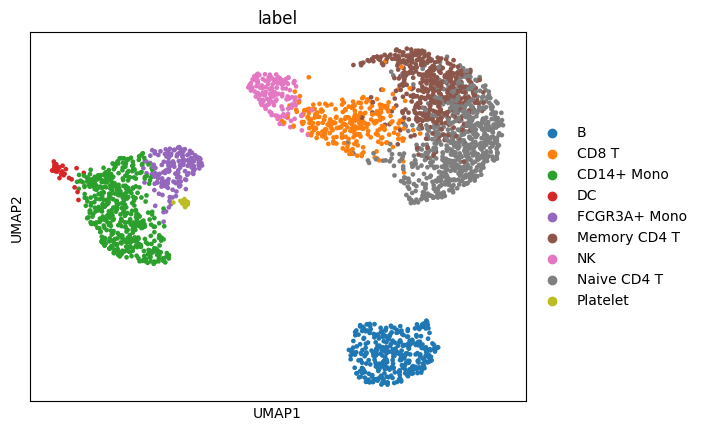

In [11]:
adata = RNA3k_andata[:, common_genes].copy()
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['label'])

In [12]:
sc.tl.rank_genes_groups(adata, 'label', method='wilcoxon')
df_3k = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(200)
df_3k.head()

,B,CD8 T,CD14+ Mono,DC,FCGR3A+ Mono,Memory CD4 T,NK,Naive CD4 T,Platelet
0,CD74,CCL5,LYZ,HLA-DPB1,LST1,LTB,NKG7,RPS12,PF4
1,CD79A,NKG7,S100A9,HLA-DPA1,FCER1G,IL32,GZMB,RPS6,PPBP
2,HLA-DRA,B2M,S100A8,HLA-DRB1,AIF1,LDHB,PRF1,RPS27,NRGN
3,CD79B,GZMA,TYROBP,HLA-DRA,FCGR3A,CD3D,GNLY,RPL32,GPX1
4,HLA-DPB1,CST7,FTL,CD74,COTL1,IL7R,CTSW,RPS14,RGS18


/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


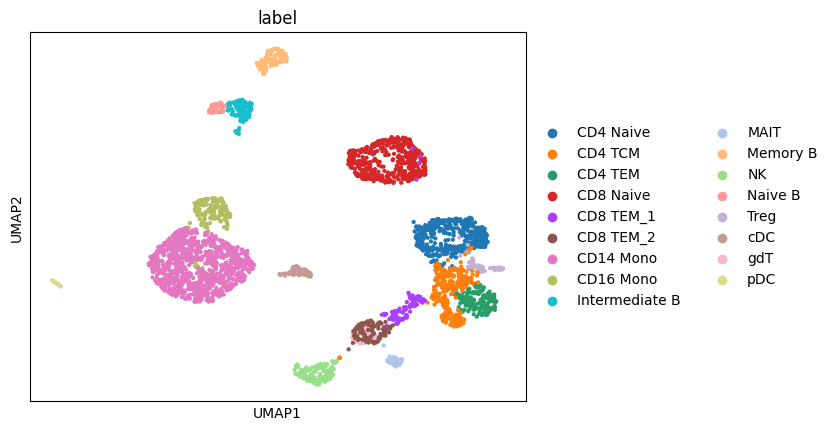

In [13]:
adata = RNA10k_andata[:, common_genes].copy()
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['label'])

In [14]:
sc.tl.rank_genes_groups(adata, 'label', method='wilcoxon')
df_10k = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(200)
df_10k.head()

,CD4 Naive,CD4 TCM,CD4 TEM,CD8 Naive,CD8 TEM_1,CD8 TEM_2,CD14 Mono,CD16 Mono,Intermediate B,MAIT,Memory B,NK,Naive B,Treg,cDC,gdT,pDC
0,ANKRD55,MAF,SEMA5A,NRCAM,GZMK,GZMH,DYSF,CDKN1C,RHEX,SLC4A10,TCL1A,NCAM1,SSPN,FOXP3,CLEC10A,TRGC1,COL26A1
1,AK5,AQP3,MYO16,LINC02446,TRGC2,TRGC2,TREM1,HES4,AL592429.2,ME1,COL19A1,KLRF1,BTNL9,RTKN2,FLT3,TRDC,LINC01478
2,AC139720.1,EPHA4,PI16,CD8B,DUSP2,FCRL6,CSF3R,SMIM25,FCRL2,COLQ,IGHD,NCR1,IGHG1,IL2RA,NDRG2,GZMH,PHEX
3,EDAR,SLAMF1,GATA3,CA6,CCL5,ADGRG1,GLT1D1,FCGR3A,FCRLA,ADAM12,LIX1-AS1,RNF165,COCH,IKZF2,DTNA,LAG3,AC097375.1
4,EPHX2,AL136456.1,MFHAS1,PTPRK,PZP,C1orf21,FCAR,PAPSS2,ANGPTL1,GZMK,LARGE1,IL18RAP,IGHGP,AC093865.1,NEGR1,RGS9,LRRC26


In [ ]:
import pandas as pd

cell_types_3k = df_3k.columns
cell_types_10k = df_10k.columns

jaccard_matrix = pd.DataFrame(index=cell_types_3k, columns=cell_types_10k)

for ct3k in cell_types_3k:
    markers_3k = set(df_3k[ct3k].dropna().unique())
    for ct10k in cell_types_10k:
        markers_10k = set(df_10k[ct10k].dropna().unique())
        
        intersection = markers_3k.intersection(markers_10k)
        union = markers_3k.union(markers_10k)
        
        jaccard = len(intersection) / len(union) if len(union) != 0 else 0.0
        jaccard_matrix.loc[ct3k, ct10k] = jaccard

jaccard_matrix = jaccard_matrix.astype(float)


In [27]:
jaccard_matrix.T

,B,CD8 T,CD14+ Mono,DC,FCGR3A+ Mono,Memory CD4 T,NK,Naive CD4 T,Platelet
CD4 Naive,0.015228,0.023018,0.000000,0.005025,0.002506,0.041667,0.012658,0.041667,0.005025
CD4 TCM,0.007557,0.033592,0.000000,0.002506,0.000000,0.055409,0.020408,0.036269,0.005025
CD4 TEM,0.005025,0.033592,0.007557,0.010101,0.007557,0.047120,0.023018,0.028278,0.002506
CD8 Naive,0.015228,0.041667,0.000000,0.005025,0.002506,0.038961,0.028278,0.036269,0.007557
CD8 TEM_1,0.010101,0.098901,0.002506,0.002506,0.002506,0.025641,0.078167,0.012658,0.007557
CD8 TEM_2,0.002506,0.129944,0.017812,0.023018,0.023018,0.025641,0.120448,0.007557,0.012658
CD14 Mono,0.000000,0.000000,0.061008,0.025641,0.038961,0.000000,0.000000,0.000000,0.007557
CD16 Mono,0.010101,0.002506,0.089918,0.058201,0.104972,0.000000,0.012658,0.000000,0.012658
Intermediate B,0.183432,0.000000,0.023018,0.047120,0.025641,0.005025,0.000000,0.002506,0.010101
MAIT,0.005025,0.092896,0.005025,0.010101,0.007557,0.033592,0.069519,0.012658,0.005025


In [15]:
# 把 label 中的 
# Naive CD4 T, Memory CD4 T 合并为 CD4 T；
# FCGR3A+ Mono 替换为 CD16 Mono；
# CD14+ Mono 替换为 CD14 Mono；

replace_dict = {
    'CD14+ Mono': 'CD14 Mono',
    'Naive CD4 T':'CD4 T',
    'Memory CD4 T':'CD4 T',
    'FCGR3A+ Mono':'CD16 Mono'
}

label['x'] = label['x'].replace(replace_dict)
label

,x
AAACATACAACCAC-1,CD4 T
AAACATTGAGCTAC-1,B
AAACATTGATCAGC-1,CD4 T
AAACCGTGCTTCCG-1,CD14 Mono
AAACCGTGTATGCG-1,NK
...,...
TTTCGAACTCTCAT-1,CD14 Mono
TTTCTACTGAGGCA-1,B
TTTCTACTTCCTCG-1,B
TTTGCATGAGAGGC-1,B


In [16]:
# CD4 Naive, CD4 TCM, CD4 TEM 合并为 CD4 T；
# CD8 TEM_1, CD8 TEM_2 合并为 CD8 T；
# Intermediate B, Memory B, Naive B 合并为 B；
# cDC 替换为DC。

replace_dict = {
    'CD4 Naive': 'CD4 T',
    'CD4 TCM': 'CD4 T',
    'CD4 TEM': 'CD4 T',
    'CD8 TEM_1': 'CD8 T',
    'CD8 TEM_2': 'CD8 T',
    'Intermediate B': 'B',
    'Memory B': 'B',
    'Naive B': 'B',
    'cDC': 'DC'
}

RNA_cluster_10k['cluster'] = RNA_cluster_10k['cluster'].replace(replace_dict)
RNA_cluster_10k

,cell,cluster
0,Agg_1,CD4 T
1,Agg_2,CD4 T
2,Agg_3,CD4 T
3,Agg_4,CD4 T
4,Agg_5,CD4 T
...,...,...
3192,Agg_3197,CD8 T
3193,Agg_3198,CD8 T
3194,Agg_3199,CD8 T
3195,Agg_3200,CD8 T


In [17]:
np.unique(RNA_cluster_10k.cluster)

array(['B', 'CD14 Mono', 'CD16 Mono', 'CD4 T', 'CD8 Naive', 'CD8 T', 'DC',
       'MAIT', 'NK', 'Treg', 'gdT', 'pDC'], dtype=object)

In [18]:
np.unique(label.x)

array(['B', 'CD14 Mono', 'CD16 Mono', 'CD4 T', 'CD8 T', 'DC', 'NK',
       'Platelet'], dtype=object)

In [19]:
set(label.x).intersection(set(RNA_cluster_10k.cluster))

{'B', 'CD14 Mono', 'CD16 Mono', 'CD4 T', 'CD8 T', 'DC', 'NK'}

In [20]:
keep_types = {'B', 'CD14 Mono', 'CD16 Mono', 'CD4 T', 'CD8 T', 'DC', 'NK'}

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


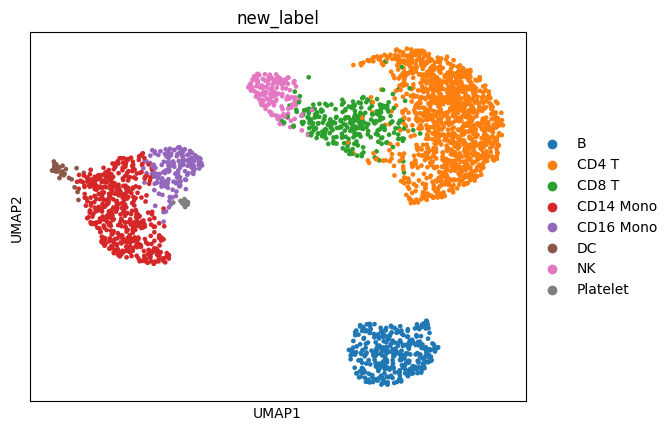

In [21]:
adata = RNA3k_andata[:, common_genes].copy()
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10)
sc.tl.umap(adata)

adata.obs["new_label"] = list(label.x)
sc.pl.umap(adata, color = ['new_label'])

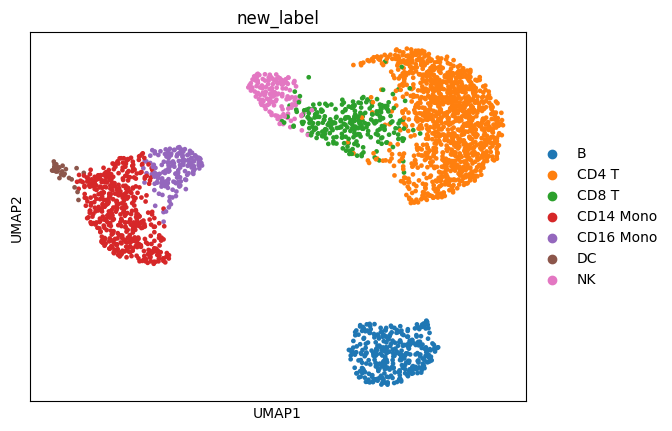

In [22]:
adata_filtered_RNA_3k = adata[adata.obs['new_label'].isin(keep_types)].copy()
sc.pl.umap(adata_filtered_RNA_3k, color = ['new_label'])

In [23]:
adata_filtered_RNA_3k

AnnData object with n_obs × n_vars = 2624 × 2000
    obs: 'label', 'new_label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'new_label_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


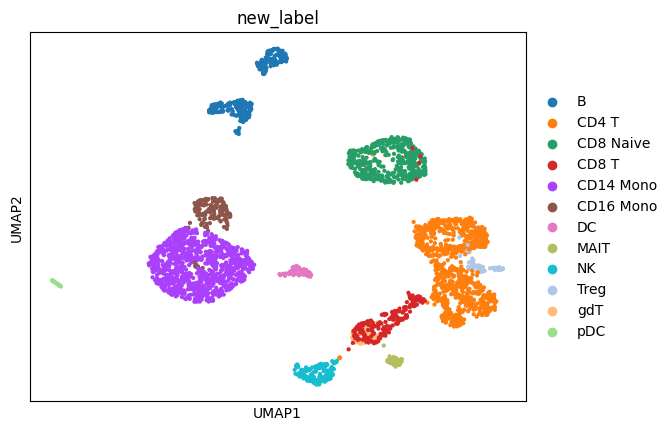

In [24]:
adata = RNA10k_andata[:, common_genes].copy()
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata)

adata.obs["new_label"] = list(RNA_cluster_10k.cluster)
sc.pl.umap(adata, color = ['new_label'])

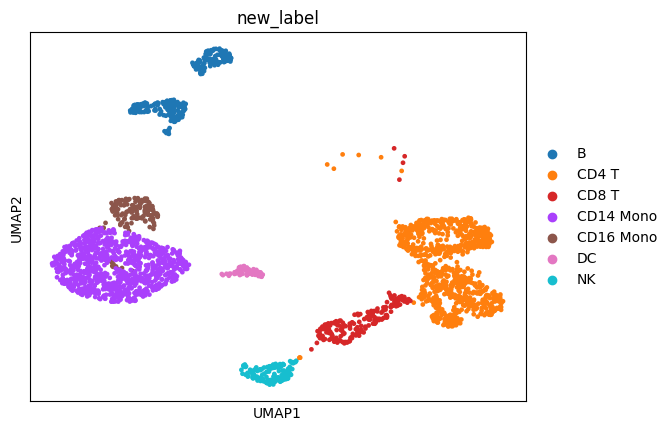

In [25]:
adata_filtered_RNA_10k = adata[adata.obs['new_label'].isin(keep_types)].copy()
sc.pl.umap(adata_filtered_RNA_10k, color = ['new_label'])

In [26]:
adata_filtered_RNA_10k

AnnData object with n_obs × n_vars = 2589 × 2000
    obs: 'label', 'new_label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'new_label_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [50]:
RNA_cluster_10k.to_csv('PBMC3kdata/new_pbmc10k_label.txt', sep = '\t', index = True)
label.to_csv('PBMC3kdata/new_pbmc3k_RNA_label.txt', sep = '\t', index = True)

In [27]:
common_genes = adata_filtered_RNA_10k.var_names.intersection(adata_filtered_RNA_3k.var_names)
common_genes

Index(['ISG15', 'TNFRSF4', 'TNFRSF25', 'CA6', 'RBP7', 'TNFRSF1B', 'EFHD2',
       'CDA', 'C1QA', 'C1QC',
       ...
       'PRR5', 'TTC38', 'TYMP', 'SAMSN1', 'MAP3K7CL', 'KCNE1', 'BACE2',
       'S100B', 'MT-CO2', 'MT-CYB'],
      dtype='object', length=450)

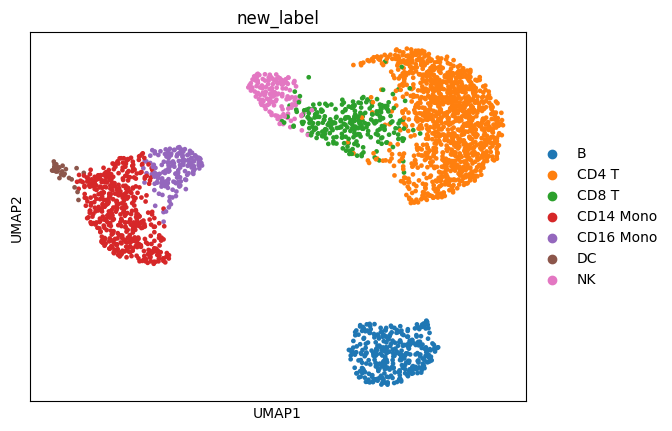

In [28]:
adata = adata_filtered_RNA_3k[:, common_genes]
# sc.pp.scale(adata)
# sc.tl.pca(adata)
# sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
# sc.tl.umap(adata)

sc.pl.umap(adata, color = ['new_label'])

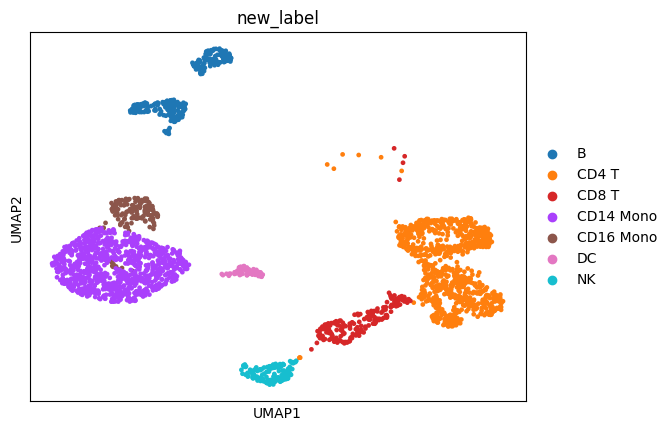

In [29]:
adata = adata_filtered_RNA_10k[:, common_genes]
# sc.pp.scale(adata)
# sc.tl.pca(adata)
# sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
# sc.tl.umap(adata)

sc.pl.umap(adata, color = ['new_label'])

In [30]:
adata_filtered_RNA_3k.obs["batch"] = "RNA 3k"
adata_filtered_RNA_10k.obs["batch"] = "RNA 10k"

In [ ]:
list(common_genes).to_csv("")

Index(['ISG15', 'TNFRSF4', 'TNFRSF25', 'CA6', 'RBP7', 'TNFRSF1B', 'EFHD2',
       'CDA', 'C1QA', 'C1QC',
       ...
       'PRR5', 'TTC38', 'TYMP', 'SAMSN1', 'MAP3K7CL', 'KCNE1', 'BACE2',
       'S100B', 'MT-CO2', 'MT-CYB'],
      dtype='object', length=450)

In [ ]:
import numpy as np
a=np.array(common_genes)
np.save("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/3k10krna_common_genes.npy",a) # 保存为.npy格式

用scVI计算cost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import scanpy as sc
from anndata import AnnData
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch
from rich import print

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/

In [3]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.2.1

In [6]:
RNA_data_3k = pd.read_csv('/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/PBMC3kdata/pbmc3k_RNA_data_hg38.txt', sep='\t', index_col=0)
RNA_data_3k

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
AL627309.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AP006222.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
RP11-206L10.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
RP11-206L10.9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
LINC00115,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AL592183.1,0.0,1.111715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AL354822.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.378132,0.0
PNRC2.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [7]:
RNA_data_10k = pd.read_csv('/home/nas2/biod/yangchenghui/my_ych_project_PBMC/pbmc_data/PBMC_RNA_agg_count.txt', sep='\t', index_col=0)
RNA_data_10k

,Agg_1,Agg_2,Agg_3,Agg_4,Agg_5,Agg_6,Agg_7,Agg_8,Agg_9,Agg_10,...,Agg_3192,Agg_3193,Agg_3194,Agg_3195,Agg_3196,Agg_3197,Agg_3198,Agg_3199,Agg_3200,Agg_3201
MIR1302-2HG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC023491.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.0,0.959696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_path = "/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/feature_selected_data/"
RNA_cluster_3k = pd.read_csv(data_path+"new_pbmc3k_RNA_label_7clsters.txt", sep='\t')
RNA_cluster_10k = pd.read_csv(data_path+"new_pbmc10k_label_7clsters.txt", sep='\t',index_col=0)

In [9]:
RNA_cluster_10k

,cell,cluster
0,Agg_1,CD4 T
1,Agg_2,CD4 T
2,Agg_3,CD4 T
3,Agg_4,CD4 T
4,Agg_5,CD4 T
...,...,...
2584,Agg_3197,CD8 T
2585,Agg_3198,CD8 T
2586,Agg_3199,CD8 T
2587,Agg_3200,CD8 T


In [14]:
#读取
common_genes = np.load("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/3k10krna_common_genes.npy",allow_pickle=True)
common_genes[:5]

array(['ISG15', 'TNFRSF4', 'TNFRSF25', 'CA6', 'RBP7'], dtype=object)

In [11]:
RNA_data_3k_new = RNA_data_3k.loc[common_genes,RNA_cluster_3k.cell]
RNA_data_10k_new = RNA_data_10k.loc[common_genes,RNA_cluster_10k.cell]

In [17]:
import anndata
RNA_obs_3k = pd.DataFrame({"batch": "RNA 3k", "cell_label": list(RNA_cluster_3k.cluster)}, index=RNA_data_3k_new.columns)
RNA_obs_10k = pd.DataFrame({"batch": "RNA 10k", "cell_label": list(RNA_cluster_10k.cluster)}, index=RNA_data_10k_new.columns)
RNA_adata_3k = anndata.AnnData(X=RNA_data_3k_new.T, obs=RNA_obs_3k, var=pd.DataFrame(index=common_genes))
RNA_adata_10k = anndata.AnnData(X=RNA_data_10k_new.T, obs=RNA_obs_10k, var=pd.DataFrame(index=common_genes))
RNA_adata_3k,RNA_adata_10k

(AnnData object with n_obs × n_vars = 2624 × 450
     obs: 'batch', 'cell_label',
 AnnData object with n_obs × n_vars = 2589 × 450
     obs: 'batch', 'cell_label')

In [18]:
import anndata

adata = anndata.concat([RNA_adata_3k,RNA_adata_10k])
adata.layers["counts"] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 5213 × 450
    obs: 'batch', 'cell_label'
    layers: 'counts'

In [19]:
# adata 存储与读取
adata.write("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/origin_concat_adata.h5ad")
# adata = anndata.read_h5ad("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/origin_concat_adata.h5ad")
# adata

In [20]:
adata.raw = adata  # keep full dimension safe
# sc.pp.highly_variable_genes(
#     adata,
#     flavor="seurat_v3",
#     n_top_genes=2000,
#     layer="counts",
#     batch_key="batch",
#     subset=True,
# )

In [21]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [22]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [23]:
model.train()

Trainer will use only 1 of 10 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=10)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8,9]
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many work

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


In [24]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [25]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
# sc.tl.leiden(adata)

In [26]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

Trainer will use only 1 of 10 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=10)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


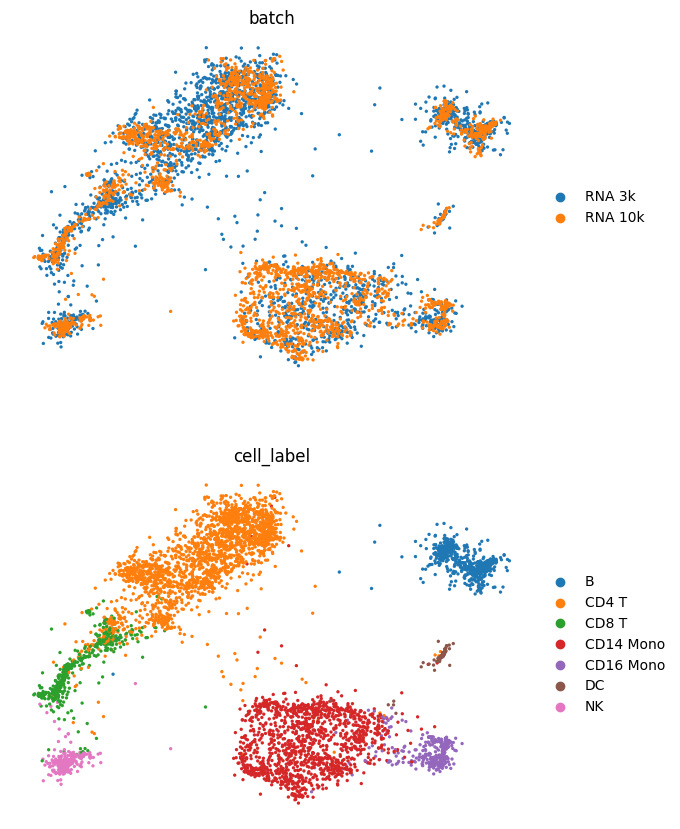

In [ ]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["batch", "cell_label"],
    frameon=False,
    ncols=1,
)

In [28]:
adata.write_h5ad("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/PBMC_scVI_adata.h5ad")

In [ ]:
import anndata
adata = anndata.read("/home/nas2/biod/yangchenghui/my_ych_project_PBMC/PBMC10kRNA&PBMC3kATAC/scVI_result/PBMC_scVI_adata.h5ad")
adata

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4807 × 710
    obs: 'batch', '_scvi_batch', '_scvi_labels', 'label'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'label_colors', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

[<Axes: title={'center': 'batch'}, xlabel='X_scVI_MDE1', ylabel='X_scVI_MDE2'>,
 <Axes: title={'center': 'cell_label'}, xlabel='X_scVI_MDE1', ylabel='X_scVI_MDE2'>]

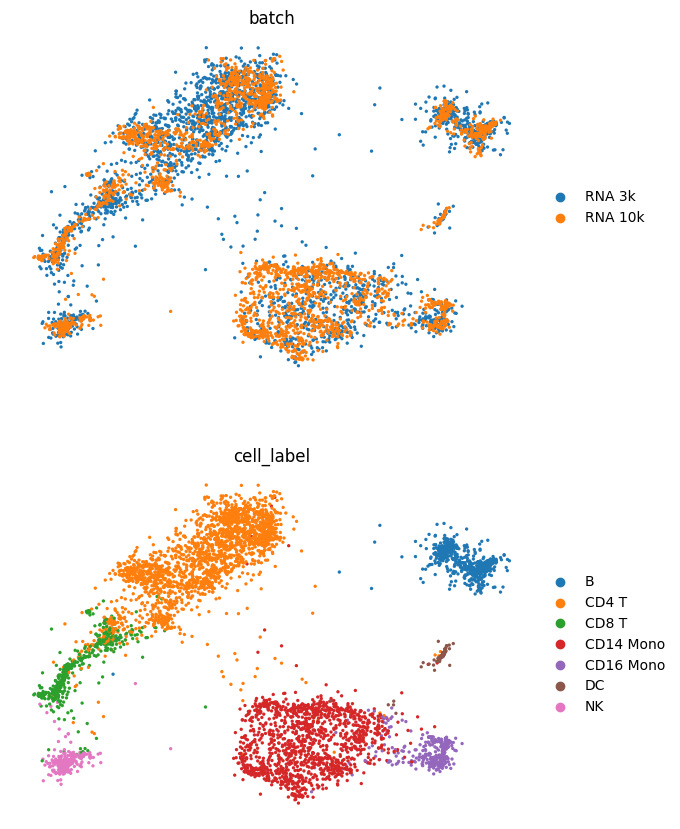

In [29]:
sc.pl.embedding(
    adata,
    basis='X_scVI_MDE',
    color=["batch", "cell_label"],
    frameon=False,
    ncols=1,show=False
)
# pl.savefig(file_path + "pdf/aggBMMC_scVI_embedding.pdf")

In [31]:
rna_emd = adata[adata.obs["batch"] == "RNA 3k"].obsm['X_scVI']
atac_emd = adata[adata.obs["batch"] == "RNA 10k"].obsm['X_scVI']
atac_emd.shape, rna_emd.shape

((2589, 30), (2624, 30))

计算MNN相似度

In [32]:
import sys
sys.path.insert(1, '/home/nas2/biod/yangchenghui/FGOT-master')
from FGOT import preprocess as pre

In [33]:
atac_emd.shape

(2589, 30)

In [34]:
rna_emd.shape

(2624, 30)

In [ ]:
rna_cell_names = adata[adata.obs["batch"] == "RNA 3k"].obs_names
atac_cell_names = adata[adata.obs["batch"] == "RNA 10k"].obs_names
rna_cell_labels = adata[adata.obs["batch"] == "RNA 3k"].obs["cell_label"]
atac_cell_labels = adata[adata.obs["batch"] == "RNA 10k"].obs["cell_label"]

In [40]:
S_m = pre.calculate_cell_similarity_byMNN(atac_emd, rna_emd, atac_cell_names, rna_cell_names, scale=0, knn = 50)
r = pre.check_mnn_accuracy(S_m, atac_cell_labels, rna_cell_labels)
print("The accuracy of identifying MNN pairs is:", r)

the number of MNN pairs is  53331


/home/nas2/biod/yangchenghui/FGOT-master/FGOT/preprocess.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_cp = label2[c_p]
/home/nas2/biod/yangchenghui/FGOT-master/FGOT/preprocess.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  con_same[p,0] = sum(label_cp == label1[p])/len(c_p)


The accuracy of identifying MNN pairs is: 0.8487258515087492